**SUPPORT VECTOR MACHINE**

**PROBLEM STATMENT**
Given a dataset of past traffic accidents, the goal is to predict the severity of future accidents. The severity can be classified into three levels, such as Slight Injury,Serious Injury,Fatal injury. The prediction can help authorities take preventive measures to minimize the likelihood and impact of future accidents, such as improving road infrastructure, enforcing traffic rules, and raising public awareness.

**Dataset**
The link of the dataset is given:

https://www.kaggle.com/datasets/saurabhshahane/road-traffic-accidents

**AIM**
Predicting the accident Accident severity

In [ ]:
#Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mp
import seaborn as sns

**LOADING THE DATASET**

In [ ]:
#Import dataset
df = pd.read_csv("/content/RTA Dataset.csv",na_values=['na'])

In [ ]:
df.head()

,Time,Day_of_week,Age_band_of_driver,Sex_of_driver,Educational_level,Vehicle_driver_relation,Driving_experience,Type_of_vehicle,Owner_of_vehicle,Service_year_of_vehicle,...,Vehicle_movement,Casualty_class,Sex_of_casualty,Age_band_of_casualty,Casualty_severity,Work_of_casuality,Fitness_of_casuality,Pedestrian_movement,Cause_of_accident,Accident_severity
0,17:02:00,Monday,18-30,Male,Above high school,Employee,1-2yr,Automobile,Owner,Above 10yr,...,Going straight,NaN,NaN,NaN,NaN,NaN,NaN,Not a Pedestrian,Moving Backward,Slight Injury
1,17:02:00,Monday,31-50,Male,Junior high school,Employee,Above 10yr,Public (> 45 seats),Owner,5-10yrs,...,Going straight,NaN,NaN,NaN,NaN,NaN,NaN,Not a Pedestrian,Overtaking,Slight Injury
2,17:02:00,Monday,18-30,Male,Junior high school,Employee,1-2yr,Lorry (41?100Q),Owner,NaN,...,Going straight,Driver or rider,Male,31-50,3.0,Driver,NaN,Not a Pedestrian,Changing lane to the left,Serious Injury
3,1:06:00,Sunday,18-30,Male,Junior high school,Employee,5-10yr,Public (> 45 seats),Governmental,NaN,...,Going straight,Pedestrian,Female,18-30,3.0,Driver,Normal,Not a Pedestrian,Changing lane to the right,Slight Injury
4,1:06:00,Sunday,18-30,Male,Junior high school,Employee,2-5yr,NaN,Owner,5-10yrs,...,Going straight,NaN,NaN,NaN,NaN,NaN,NaN,Not a Pedestrian,Overtaking,Slight Injury


**DATA DESCRIPTION**

In [ ]:
df.shape

(12316, 32)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12316 entries, 0 to 12315
Data columns (total 32 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Time                         12316 non-null  object 
 1   Day_of_week                  12316 non-null  object 
 2   Age_band_of_driver           12316 non-null  object 
 3   Sex_of_driver                12316 non-null  object 
 4   Educational_level            11575 non-null  object 
 5   Vehicle_driver_relation      11737 non-null  object 
 6   Driving_experience           11487 non-null  object 
 7   Type_of_vehicle              11366 non-null  object 
 8   Owner_of_vehicle             11834 non-null  object 
 9   Service_year_of_vehicle      8388 non-null   object 
 10  Defect_of_vehicle            7889 non-null   object 
 11  Area_accident_occured        12077 non-null  object 
 12  Lanes_or_Medians             11931 non-null  object 
 13  Road_allignment 

In [ ]:
df.describe()

,Number_of_vehicles_involved,Number_of_casualties,Casualty_severity
count,12316.000000,12316.000000,7873.000000
mean,2.040679,1.548149,2.895466
std,0.688790,1.007179,0.316583
min,1.000000,1.000000,1.000000
25%,2.000000,1.000000,3.000000
50%,2.000000,1.000000,3.000000
75%,2.000000,2.000000,3.000000
max,7.000000,8.000000,3.000000


**Dropping columns**

Dropping the columns which has too much null values.

In [ ]:
df.drop(['Defect_of_vehicle','Service_year_of_vehicle','Casualty_class','Sex_of_casualty','Age_band_of_casualty','Work_of_casuality','Fitness_of_casuality','Casualty_severity','Time'], axis=1,inplace=True)

In [ ]:
df

,Day_of_week,Age_band_of_driver,Sex_of_driver,Educational_level,Vehicle_driver_relation,Driving_experience,Type_of_vehicle,Owner_of_vehicle,Area_accident_occured,Lanes_or_Medians,...,Road_surface_conditions,Light_conditions,Weather_conditions,Type_of_collision,Number_of_vehicles_involved,Number_of_casualties,Vehicle_movement,Pedestrian_movement,Cause_of_accident,Accident_severity
0,Monday,18-30,Male,Above high school,Employee,1-2yr,Automobile,Owner,Residential areas,NaN,...,Dry,Daylight,Normal,Collision with roadside-parked vehicles,2,2,Going straight,Not a Pedestrian,Moving Backward,Slight Injury
1,Monday,31-50,Male,Junior high school,Employee,Above 10yr,Public (> 45 seats),Owner,Office areas,Undivided Two way,...,Dry,Daylight,Normal,Vehicle with vehicle collision,2,2,Going straight,Not a Pedestrian,Overtaking,Slight Injury
2,Monday,18-30,Male,Junior high school,Employee,1-2yr,Lorry (41?100Q),Owner,Recreational areas,other,...,Dry,Daylight,Normal,Collision with roadside objects,2,2,Going straight,Not a Pedestrian,Changing lane to the left,Serious Injury
3,Sunday,18-30,Male,Junior high school,Employee,5-10yr,Public (> 45 seats),Governmental,Office areas,other,...,Dry,Darkness - lights lit,Normal,Vehicle with vehicle collision,2,2,Going straight,Not a Pedestrian,Changing lane to the right,Slight Injury
4,Sunday,18-30,Male,Junior high school,Employee,2-5yr,NaN,Owner,Industrial areas,other,...,Dry,Darkness - lights lit,Normal,Vehicle with vehicle collision,2,2,Going straight,Not a Pedestrian,Overtaking,Slight Injury
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12311,Wednesday,31-50,Male,NaN,Employee,2-5yr,Lorry (11?40Q),Owner,Outside rural areas,Undivided Two way,...,Dry,Daylight,Normal,Vehicle with vehicle collision,2,1,Going straight,Not a Pedestrian,No distancing,Slight Injury
12312,Sunday,Unknown,Male,Elementary school,Employee,5-10yr,Automobile,Owner,Outside rural areas,Two-way (divided with broken lines road marking),...,Dry,Daylight,Normal,Vehicle with vehicle collision,2,1,Other,Not a Pedestrian,No distancing,Slight Injury
12313,Sunday,Over 51,Male,Junior high school,Employee,5-10yr,Bajaj,Owner,Outside rural areas,Two-way (divided with broken lines road marking),...,Dry,Daylight,Normal,Vehicle with vehicle collision,1,1,Other,Not a Pedestrian,Changing lane to the right,Serious Injury
12314,Sunday,18-30,Female,Junior high school,Employee,Above 10yr,Lorry (41?100Q),Owner,Office areas,Undivided Two way,...,Dry,Darkness - lights lit,Normal,Vehicle with vehicle collision,2,1,Other,Not a Pedestrian,Driving under the influence of drugs,Slight Injury


**Handling Mising Values**

In [ ]:
df.isnull().sum()

Day_of_week                      0
Age_band_of_driver               0
Sex_of_driver                    0
Educational_level              741
Vehicle_driver_relation        579
Driving_experience             829
Type_of_vehicle                950
Owner_of_vehicle               482
Area_accident_occured          239
Lanes_or_Medians               385
Road_allignment                142
Types_of_Junction              887
Road_surface_type              172
Road_surface_conditions          0
Light_conditions                 0
Weather_conditions               0
Type_of_collision              155
Number_of_vehicles_involved      0
Number_of_casualties             0
Vehicle_movement               308
Pedestrian_movement              0
Cause_of_accident                0
Accident_severity                0
dtype: int64

**Inference:** There are null values in our dataset.

In [ ]:
#storing all the categorical variable in categorical.
categorical = [i for i in df.columns if df[i].dtype =='object']
num_vari = len(categorical)
print('The categorical variables are:',categorical)
print('The categorical variables are:',num_vari)

The categorical variables are: ['Day_of_week', 'Age_band_of_driver', 'Sex_of_driver', 'Educational_level', 'Vehicle_driver_relation', 'Driving_experience', 'Type_of_vehicle', 'Owner_of_vehicle', 'Area_accident_occured', 'Lanes_or_Medians', 'Road_allignment', 'Types_of_Junction', 'Road_surface_type', 'Road_surface_conditions', 'Light_conditions', 'Weather_conditions', 'Type_of_collision', 'Vehicle_movement', 'Pedestrian_movement', 'Cause_of_accident', 'Accident_severity']
The categorical variables are: 21


In [ ]:
for i in categorical:
    print(df[i].value_counts())

Friday       2041
Thursday     1851
Wednesday    1840
Tuesday      1770
Monday       1681
Saturday     1666
Sunday       1467
Name: Day_of_week, dtype: int64
18-30       4271
31-50       4087
Over 51     1585
Unknown     1548
Under 18     825
Name: Age_band_of_driver, dtype: int64
Male       11437
Female       701
Unknown      178
Name: Sex_of_driver, dtype: int64
Junior high school    7619
Elementary school     2163
High school           1110
Above high school      362
Writing & reading      176
Unknown                100
Illiterate              45
Name: Educational_level, dtype: int64
Employee    9627
Owner       1973
Other        123
Unknown       14
Name: Vehicle_driver_relation, dtype: int64
5-10yr        3363
2-5yr         2613
Above 10yr    2262
1-2yr         1756
Below 1yr     1342
No Licence     118
unknown         33
Name: Driving_experience, dtype: int64
Automobile              3205
Lorry (41?100Q)         2186
Other                   1208
Pick up upto 10Q         811
Public

In [ ]:
#filling the categorical null values of the categorical using mode the values.
for i in categorical:
  df[i].fillna(df[i].mode()[0],inplace=True)

In [ ]:
df.isnull().sum()

Day_of_week                    0
Age_band_of_driver             0
Sex_of_driver                  0
Educational_level              0
Vehicle_driver_relation        0
Driving_experience             0
Type_of_vehicle                0
Owner_of_vehicle               0
Area_accident_occured          0
Lanes_or_Medians               0
Road_allignment                0
Types_of_Junction              0
Road_surface_type              0
Road_surface_conditions        0
Light_conditions               0
Weather_conditions             0
Type_of_collision              0
Number_of_vehicles_involved    0
Number_of_casualties           0
Vehicle_movement               0
Pedestrian_movement            0
Cause_of_accident              0
Accident_severity              0
dtype: int64

**Inference:** All the null values are handled using mode imputation.

**EDA(Exploratory Data Analysis)**

array([[<AxesSubplot:title={'center':'Number_of_vehicles_involved'}>,
        <AxesSubplot:title={'center':'Number_of_casualties'}>]],
      dtype=object)

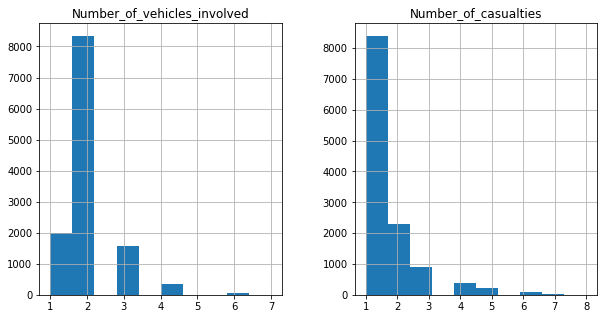

In [ ]:
df.hist(figsize = (10,5))

**Inference:** Most of the accidents are 2 vehicles involved. 1 casualties is involved.

<AxesSubplot:xlabel='Accident_severity', ylabel='count'>

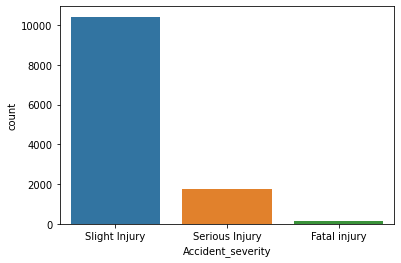

In [ ]:
#ploting the accident severity
sns.countplot(x=df['Accident_severity'])

**Inference:** The target variable is imbalanced.

<AxesSubplot:>

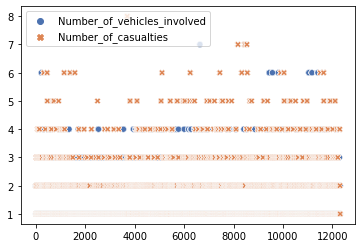

In [ ]:
sns.scatterplot(data = df, palette = "deep")

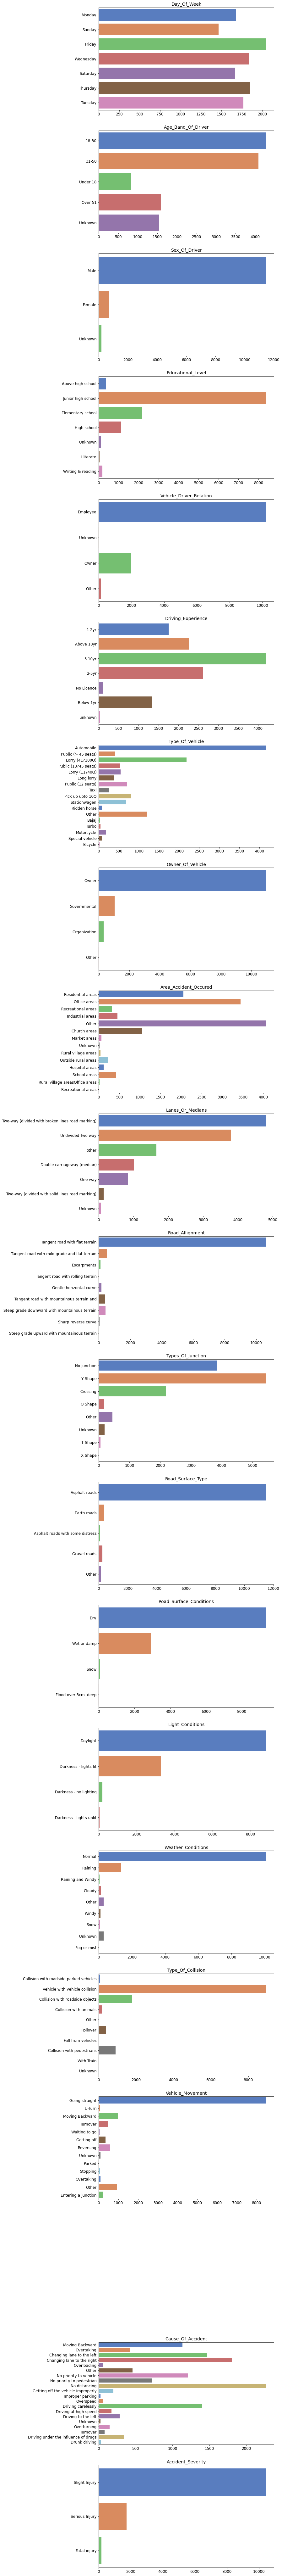

In [ ]:
plt.figure(figsize=(10,200))
count = 1
for col in categorical:
    if count <= df.shape[1] and col!='Pedestrian_movement':
        ax1 = plt.subplot(28,1,count)
        sns.countplot(data=df, y=col, palette='muted')
        plt.xticks(fontsize=12)
        plt.yticks(fontsize=12)
        plt.title(col.title(), fontsize=14)
        plt.xlabel('')
        plt.ylabel('')
    count +=1

**Feature Selection**

Since there are many categorical variable we apply X^2 freature selection method.

In [ ]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [ ]:
#creating new data frame
df1 = pd.DataFrame()

In [ ]:
for i in categorical:
  if i!= 'Accident_severity':
    df1[i]=le.fit_transform(df[i])

In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12316 entries, 0 to 12315
Data columns (total 20 columns):
 #   Column                   Non-Null Count  Dtype
---  ------                   --------------  -----
 0   Day_of_week              12316 non-null  int64
 1   Age_band_of_driver       12316 non-null  int64
 2   Sex_of_driver            12316 non-null  int64
 3   Educational_level        12316 non-null  int64
 4   Vehicle_driver_relation  12316 non-null  int64
 5   Driving_experience       12316 non-null  int64
 6   Type_of_vehicle          12316 non-null  int64
 7   Owner_of_vehicle         12316 non-null  int64
 8   Area_accident_occured    12316 non-null  int64
 9   Lanes_or_Medians         12316 non-null  int64
 10  Road_allignment          12316 non-null  int64
 11  Types_of_Junction        12316 non-null  int64
 12  Road_surface_type        12316 non-null  int64
 13  Road_surface_conditions  12316 non-null  int64
 14  Light_conditions         12316 non-null  int64
 15  We

<AxesSubplot:>

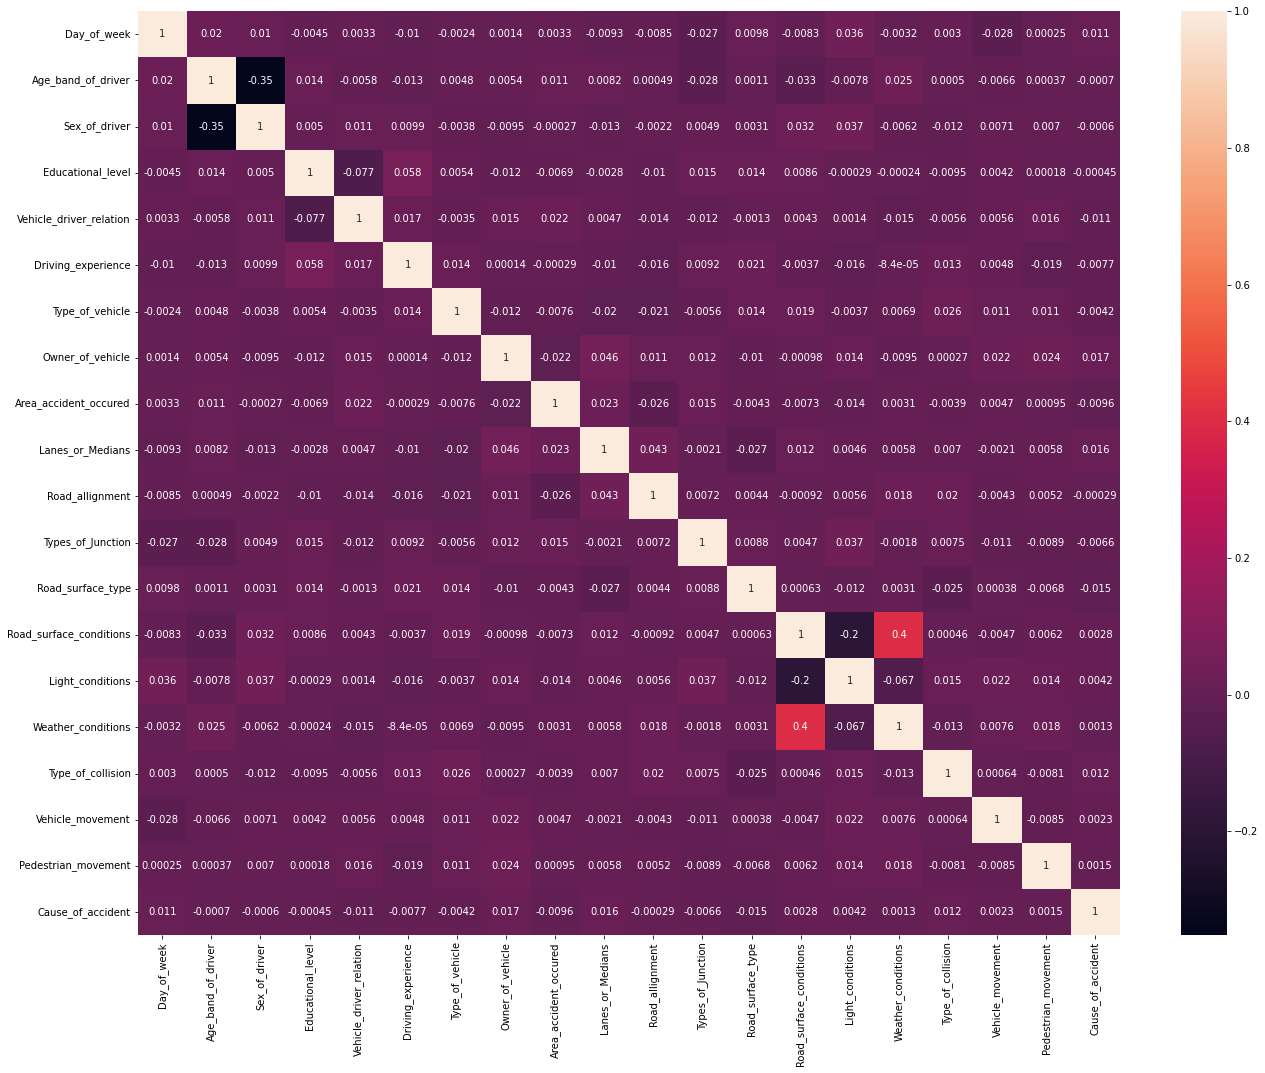

In [ ]:
plt.figure(figsize=(22,17))
sns.heatmap(df1.corr(),annot =True)

In [ ]:
#label encoded data set
df1.head()

,Day_of_week,Age_band_of_driver,Sex_of_driver,Educational_level,Vehicle_driver_relation,Driving_experience,Type_of_vehicle,Owner_of_vehicle,Area_accident_occured,Lanes_or_Medians,Road_allignment,Types_of_Junction,Road_surface_type,Road_surface_conditions,Light_conditions,Weather_conditions,Type_of_collision,Vehicle_movement,Pedestrian_movement,Cause_of_accident
0,1,0,1,0,0,0,0,3,9,2,5,1,0,0,3,2,3,2,5,9
1,1,1,1,4,0,3,11,3,6,4,5,1,0,0,3,2,8,2,5,16
2,1,0,1,4,0,0,5,3,1,6,5,1,0,0,3,2,2,2,5,0
3,3,0,1,4,0,2,11,0,6,6,6,7,2,0,0,2,8,2,5,1
4,3,0,1,4,0,1,0,3,4,6,5,7,0,0,0,2,8,2,5,16


In [ ]:
from sklearn.feature_selection import chi2
f_p_values=chi2(df1,df['Accident_severity'])

In [ ]:
#f_p_values will return Fscore and pvalues
f_p_values

(array([ 0.15822071,  8.91539214,  0.1431894 ,  0.17458477,  5.34534549,
         4.49967858,  1.07767124,  1.10426215,  3.61654037,  3.28161464,
         0.1319306 ,  3.08648691,  6.99480557,  0.61510308, 16.08282359,
         1.14934538, 10.09632283,  2.20071197,  0.39747982,  3.19366551]),
 array([9.23937958e-01, 1.15890328e-02, 9.30908116e-01, 9.16409114e-01,
        6.90673790e-02, 1.05416165e-01, 5.83427189e-01, 5.75721597e-01,
        1.63937473e-01, 1.93823502e-01, 9.36163348e-01, 2.13686893e-01,
        3.02759144e-02, 7.35244973e-01, 3.21854237e-04, 5.62889079e-01,
        6.42112839e-03, 3.32752607e-01, 8.19763078e-01, 2.02536988e-01]))

In [ ]:
#for better understanding and ease of access adding them to a new dataframe
f_p_values1=pd.DataFrame({'features':df1.columns, 'Fscore': f_p_values[0], 'Pvalues':f_p_values[1]})
f_p_values1

,features,Fscore,Pvalues
0,Day_of_week,0.158221,0.923938
1,Age_band_of_driver,8.915392,0.011589
2,Sex_of_driver,0.143189,0.930908
3,Educational_level,0.174585,0.916409
4,Vehicle_driver_relation,5.345345,0.069067
5,Driving_experience,4.499679,0.105416
6,Type_of_vehicle,1.077671,0.583427
7,Owner_of_vehicle,1.104262,0.575722
8,Area_accident_occured,3.616540,0.163937
9,Lanes_or_Medians,3.281615,0.193824


In [ ]:
#since we want lower Pvalues we are sorting the features
f_p_values1.sort_values(by='Pvalues',ascending=True)

,features,Fscore,Pvalues
14,Light_conditions,16.082824,0.000322
16,Type_of_collision,10.096323,0.006421
1,Age_band_of_driver,8.915392,0.011589
12,Road_surface_type,6.994806,0.030276
4,Vehicle_driver_relation,5.345345,0.069067
5,Driving_experience,4.499679,0.105416
8,Area_accident_occured,3.616540,0.163937
9,Lanes_or_Medians,3.281615,0.193824
19,Cause_of_accident,3.193666,0.202537
11,Types_of_Junction,3.086487,0.213687


**`Inference:`** From above table we need those features which have high F-statistic value and low P-value. We remove the lowest F-statistic values.

In [ ]:
df1=df.drop(['Road_allignment','Sex_of_driver','Day_of_week','Educational_level','Pedestrian_movement','Road_surface_conditions','Type_of_vehicle'],axis=1)

In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12316 entries, 0 to 12315
Data columns (total 16 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Age_band_of_driver           12316 non-null  object
 1   Vehicle_driver_relation      12316 non-null  object
 2   Driving_experience           12316 non-null  object
 3   Owner_of_vehicle             12316 non-null  object
 4   Area_accident_occured        12316 non-null  object
 5   Lanes_or_Medians             12316 non-null  object
 6   Types_of_Junction            12316 non-null  object
 7   Road_surface_type            12316 non-null  object
 8   Light_conditions             12316 non-null  object
 9   Weather_conditions           12316 non-null  object
 10  Type_of_collision            12316 non-null  object
 11  Number_of_vehicles_involved  12316 non-null  int64 
 12  Number_of_casualties         12316 non-null  int64 
 13  Vehicle_movement             12

In [ ]:
df1.shape

(12316, 16)

In [ ]:
categorical_df1 = [i for i in df1.columns if df[i].dtype == 'object']
number = len(categorical_df1)
print(number)

14


In [ ]:
for i in categorical_df1:
    print(df1[i].value_counts())

18-30       4271
31-50       4087
Over 51     1585
Unknown     1548
Under 18     825
Name: Age_band_of_driver, dtype: int64
Employee    10206
Owner        1973
Other         123
Unknown        14
Name: Vehicle_driver_relation, dtype: int64
5-10yr        4192
2-5yr         2613
Above 10yr    2262
1-2yr         1756
Below 1yr     1342
No Licence     118
unknown         33
Name: Driving_experience, dtype: int64
Owner           10941
Governmental     1041
Organization      312
Other              22
Name: Owner_of_vehicle, dtype: int64
Other                              4058
Office areas                       3451
Residential areas                  2060
 Church areas                      1060
 Industrial areas                   456
School areas                        415
  Recreational areas                327
 Outside rural areas                218
 Hospital areas                     121
  Market areas                       63
Rural village areas                  44
Unknown                

**Inference:** Here there some values in the column which is denoted as unknown.

In [ ]:
df1.head()

,Age_band_of_driver,Vehicle_driver_relation,Driving_experience,Owner_of_vehicle,Area_accident_occured,Lanes_or_Medians,Types_of_Junction,Road_surface_type,Light_conditions,Weather_conditions,Type_of_collision,Number_of_vehicles_involved,Number_of_casualties,Vehicle_movement,Cause_of_accident,Accident_severity
0,18-30,Employee,1-2yr,Owner,Residential areas,Two-way (divided with broken lines road marking),No junction,Asphalt roads,Daylight,Normal,Collision with roadside-parked vehicles,2,2,Going straight,Moving Backward,Slight Injury
1,31-50,Employee,Above 10yr,Owner,Office areas,Undivided Two way,No junction,Asphalt roads,Daylight,Normal,Vehicle with vehicle collision,2,2,Going straight,Overtaking,Slight Injury
2,18-30,Employee,1-2yr,Owner,Recreational areas,other,No junction,Asphalt roads,Daylight,Normal,Collision with roadside objects,2,2,Going straight,Changing lane to the left,Serious Injury
3,18-30,Employee,5-10yr,Governmental,Office areas,other,Y Shape,Earth roads,Darkness - lights lit,Normal,Vehicle with vehicle collision,2,2,Going straight,Changing lane to the right,Slight Injury
4,18-30,Employee,2-5yr,Owner,Industrial areas,other,Y Shape,Asphalt roads,Darkness - lights lit,Normal,Vehicle with vehicle collision,2,2,Going straight,Overtaking,Slight Injury


**FEATURE ENGINEERING**

Imputing those unknown values using mode.

In [ ]:
from sklearn.impute import SimpleImputer
imp = SimpleImputer(missing_values='unknown', strategy='most_frequent')
imp.fit(df1)
df2=imp.transform(df1)

And forming new dataset.

In [ ]:
df2=pd.DataFrame(df2,columns=df1.columns)

In [ ]:
for i in categorical_df1:
    print(df2[i].unique())

['18-30' '31-50' 'Under 18' 'Over 51' 'Unknown']
['Employee' 'Unknown' 'Owner' 'Other']
['1-2yr' 'Above 10yr' '5-10yr' '2-5yr' 'No Licence' 'Below 1yr']
['Owner' 'Governmental' 'Organization' 'Other']
['Residential areas' 'Office areas' '  Recreational areas'
 ' Industrial areas' 'Other' ' Church areas' '  Market areas' 'Unknown'
 'Rural village areas' ' Outside rural areas' ' Hospital areas'
 'School areas' 'Rural village areasOffice areas' 'Recreational areas']
['Two-way (divided with broken lines road marking)' 'Undivided Two way'
 'other' 'Double carriageway (median)' 'One way'
 'Two-way (divided with solid lines road marking)' 'Unknown']
['No junction' 'Y Shape' 'Crossing' 'O Shape' 'Other' 'Unknown' 'T Shape'
 'X Shape']
['Asphalt roads' 'Earth roads' 'Asphalt roads with some distress'
 'Gravel roads' 'Other']
['Daylight' 'Darkness - lights lit' 'Darkness - no lighting'
 'Darkness - lights unlit']
['Normal' 'Raining' 'Raining and Windy' 'Cloudy' 'Other' 'Windy' 'Snow'
 'Unknown' 

**Inference:** Checking again there is another variable Unknown treating that in the same way.

In [ ]:
from sklearn.impute import SimpleImputer
imp = SimpleImputer(missing_values='Unknown', strategy='most_frequent')
imp.fit(df2)
df3=imp.transform(df2)

In [ ]:
df3=pd.DataFrame(df3,columns=df1.columns)

In [ ]:
df3

,Age_band_of_driver,Vehicle_driver_relation,Driving_experience,Owner_of_vehicle,Area_accident_occured,Lanes_or_Medians,Types_of_Junction,Road_surface_type,Light_conditions,Weather_conditions,Type_of_collision,Number_of_vehicles_involved,Number_of_casualties,Vehicle_movement,Cause_of_accident,Accident_severity
0,18-30,Employee,1-2yr,Owner,Residential areas,Two-way (divided with broken lines road marking),No junction,Asphalt roads,Daylight,Normal,Collision with roadside-parked vehicles,2,2,Going straight,Moving Backward,Slight Injury
1,31-50,Employee,Above 10yr,Owner,Office areas,Undivided Two way,No junction,Asphalt roads,Daylight,Normal,Vehicle with vehicle collision,2,2,Going straight,Overtaking,Slight Injury
2,18-30,Employee,1-2yr,Owner,Recreational areas,other,No junction,Asphalt roads,Daylight,Normal,Collision with roadside objects,2,2,Going straight,Changing lane to the left,Serious Injury
3,18-30,Employee,5-10yr,Governmental,Office areas,other,Y Shape,Earth roads,Darkness - lights lit,Normal,Vehicle with vehicle collision,2,2,Going straight,Changing lane to the right,Slight Injury
4,18-30,Employee,2-5yr,Owner,Industrial areas,other,Y Shape,Asphalt roads,Darkness - lights lit,Normal,Vehicle with vehicle collision,2,2,Going straight,Overtaking,Slight Injury
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12311,31-50,Employee,2-5yr,Owner,Outside rural areas,Undivided Two way,No junction,Asphalt roads,Daylight,Normal,Vehicle with vehicle collision,2,1,Going straight,No distancing,Slight Injury
12312,18-30,Employee,5-10yr,Owner,Outside rural areas,Two-way (divided with broken lines road marking),No junction,Asphalt roads,Daylight,Normal,Vehicle with vehicle collision,2,1,Other,No distancing,Slight Injury
12313,Over 51,Employee,5-10yr,Owner,Outside rural areas,Two-way (divided with broken lines road marking),No junction,Asphalt roads,Daylight,Normal,Vehicle with vehicle collision,1,1,Other,Changing lane to the right,Serious Injury
12314,18-30,Employee,Above 10yr,Owner,Office areas,Undivided Two way,No junction,Asphalt roads,Darkness - lights lit,Normal,Vehicle with vehicle collision,2,1,Other,Driving under the influence of drugs,Slight Injury


In [ ]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12316 entries, 0 to 12315
Data columns (total 16 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Age_band_of_driver           12316 non-null  object
 1   Vehicle_driver_relation      12316 non-null  object
 2   Driving_experience           12316 non-null  object
 3   Owner_of_vehicle             12316 non-null  object
 4   Area_accident_occured        12316 non-null  object
 5   Lanes_or_Medians             12316 non-null  object
 6   Types_of_Junction            12316 non-null  object
 7   Road_surface_type            12316 non-null  object
 8   Light_conditions             12316 non-null  object
 9   Weather_conditions           12316 non-null  object
 10  Type_of_collision            12316 non-null  object
 11  Number_of_vehicles_involved  12316 non-null  object
 12  Number_of_casualties         12316 non-null  object
 13  Vehicle_movement             12

In [ ]:
df3.shape

(12316, 16)

**Handling Categorical values**

Handling categorical values using one-hot encoding.

In [ ]:
#get_dummies
dummy=pd.get_dummies(df3[['Age_band_of_driver', 'Vehicle_driver_relation', 'Driving_experience','Owner_of_vehicle',
                          'Area_accident_occured', 'Lanes_or_Medians', 'Types_of_Junction', 'Road_surface_type',
                          'Light_conditions', 'Weather_conditions', 'Type_of_collision', 'Vehicle_movement',
                            'Cause_of_accident']],drop_first=True)
dummy.head()

,Age_band_of_driver_31-50,Age_band_of_driver_Over 51,Age_band_of_driver_Under 18,Vehicle_driver_relation_Other,Vehicle_driver_relation_Owner,Driving_experience_2-5yr,Driving_experience_5-10yr,Driving_experience_Above 10yr,Driving_experience_Below 1yr,Driving_experience_No Licence,...,Cause_of_accident_Moving Backward,Cause_of_accident_No distancing,Cause_of_accident_No priority to pedestrian,Cause_of_accident_No priority to vehicle,Cause_of_accident_Other,Cause_of_accident_Overloading,Cause_of_accident_Overspeed,Cause_of_accident_Overtaking,Cause_of_accident_Overturning,Cause_of_accident_Turnover
0,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [ ]:
#concatinate dummy and old data frame
df4=pd.concat([df3,dummy],axis=1)
df4.head()

,Age_band_of_driver,Vehicle_driver_relation,Driving_experience,Owner_of_vehicle,Area_accident_occured,Lanes_or_Medians,Types_of_Junction,Road_surface_type,Light_conditions,Weather_conditions,...,Cause_of_accident_Moving Backward,Cause_of_accident_No distancing,Cause_of_accident_No priority to pedestrian,Cause_of_accident_No priority to vehicle,Cause_of_accident_Other,Cause_of_accident_Overloading,Cause_of_accident_Overspeed,Cause_of_accident_Overtaking,Cause_of_accident_Overturning,Cause_of_accident_Turnover
0,18-30,Employee,1-2yr,Owner,Residential areas,Two-way (divided with broken lines road marking),No junction,Asphalt roads,Daylight,Normal,...,1,0,0,0,0,0,0,0,0,0
1,31-50,Employee,Above 10yr,Owner,Office areas,Undivided Two way,No junction,Asphalt roads,Daylight,Normal,...,0,0,0,0,0,0,0,1,0,0
2,18-30,Employee,1-2yr,Owner,Recreational areas,other,No junction,Asphalt roads,Daylight,Normal,...,0,0,0,0,0,0,0,0,0,0
3,18-30,Employee,5-10yr,Governmental,Office areas,other,Y Shape,Earth roads,Darkness - lights lit,Normal,...,0,0,0,0,0,0,0,0,0,0
4,18-30,Employee,2-5yr,Owner,Industrial areas,other,Y Shape,Asphalt roads,Darkness - lights lit,Normal,...,0,0,0,0,0,0,0,1,0,0


In [ ]:
df4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12316 entries, 0 to 12315
Columns: 103 entries, Age_band_of_driver to Cause_of_accident_Turnover
dtypes: object(16), uint8(87)
memory usage: 2.5+ MB


In [ ]:
#dropping dummied columns
df4.drop(['Age_band_of_driver', 'Vehicle_driver_relation', 'Driving_experience', 'Area_accident_occured', 'Lanes_or_Medians',
          'Types_of_Junction', 'Road_surface_type', 'Light_conditions', 'Weather_conditions', 'Type_of_collision',
          'Vehicle_movement', 'Cause_of_accident','Owner_of_vehicle'],axis=1,inplace=True)
df4.head()

,Number_of_vehicles_involved,Number_of_casualties,Accident_severity,Age_band_of_driver_31-50,Age_band_of_driver_Over 51,Age_band_of_driver_Under 18,Vehicle_driver_relation_Other,Vehicle_driver_relation_Owner,Driving_experience_2-5yr,Driving_experience_5-10yr,...,Cause_of_accident_Moving Backward,Cause_of_accident_No distancing,Cause_of_accident_No priority to pedestrian,Cause_of_accident_No priority to vehicle,Cause_of_accident_Other,Cause_of_accident_Overloading,Cause_of_accident_Overspeed,Cause_of_accident_Overtaking,Cause_of_accident_Overturning,Cause_of_accident_Turnover
0,2,2,Slight Injury,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
1,2,2,Slight Injury,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,2,2,Serious Injury,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2,2,Slight Injury,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,2,2,Slight Injury,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0


In [ ]:
x=df4.drop(['Accident_severity'],axis=1)
x.shape

(12316, 89)

In [ ]:
x.head()

,Number_of_vehicles_involved,Number_of_casualties,Age_band_of_driver_31-50,Age_band_of_driver_Over 51,Age_band_of_driver_Under 18,Vehicle_driver_relation_Other,Vehicle_driver_relation_Owner,Driving_experience_2-5yr,Driving_experience_5-10yr,Driving_experience_Above 10yr,...,Cause_of_accident_Moving Backward,Cause_of_accident_No distancing,Cause_of_accident_No priority to pedestrian,Cause_of_accident_No priority to vehicle,Cause_of_accident_Other,Cause_of_accident_Overloading,Cause_of_accident_Overspeed,Cause_of_accident_Overtaking,Cause_of_accident_Overturning,Cause_of_accident_Turnover
0,2,2,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
1,2,2,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
2,2,2,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2,2,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,2,2,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0


In [ ]:
y=df4.iloc[:,2]
y.head()

0     Slight Injury
1     Slight Injury
2    Serious Injury
3     Slight Injury
4     Slight Injury
Name: Accident_severity, dtype: object

In [ ]:
#checking the count of each item in the output column
y.value_counts()

Slight Injury     10415
Serious Injury     1743
Fatal injury        158
Name: Accident_severity, dtype: int64

<AxesSubplot:xlabel='Accident_severity', ylabel='count'>

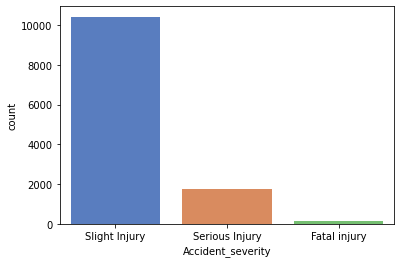

In [ ]:
#plotting count plot using seaborn
sns.countplot(x = y, palette='muted')

**Inference:** There is imbalance in the target values treating them using oversampling method.

**Oversampling**

In [ ]:
#importing SMOTE
from imblearn.over_sampling import SMOTE
oversample=SMOTE()
xo,yo=oversample.fit_resample(x,y)

In [ ]:
#checking the oversampling output
y1=pd.DataFrame(yo)
y1.value_counts()

Accident_severity
Fatal injury         10415
Serious Injury       10415
Slight Injury        10415
dtype: int64

<AxesSubplot:xlabel='Accident_severity', ylabel='count'>

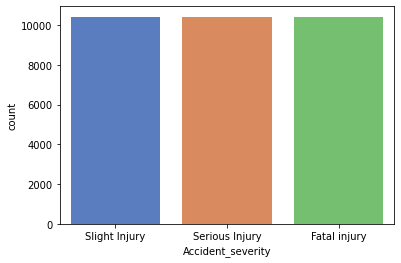

In [ ]:
#plotting count plot using seaborn
sns.countplot(x = yo, palette='muted')

**Inference:** The target variables  is balanced.

**SPLITTING THE DATASET**

In [ ]:
#converting data to training data and testing data
from sklearn.model_selection import train_test_split
#splitting 70% of the data to training data and 30% of data to testing data
x_train,x_test,y_train,y_test=train_test_split(xo,yo,test_size=0.30,random_state=42)

**Model Creation**

**SVM**

In [ ]:
#SVM model alg
from sklearn.svm import SVC
model_SVC=SVC()
model_SVC.fit(x_train,y_train)

SVC()

In [ ]:
y_SVC=model_SVC.predict(x_test)
y_SVC

array(['Serious Injury', 'Slight Injury', 'Serious Injury', ...,
       'Fatal injury', 'Serious Injury', 'Slight Injury'], dtype=object)

[[3006   85   35]
 [ 291 2229  624]
 [  32  335 2737]] 

0.8504373799871986 

                precision    recall  f1-score   support

  Fatal injury       0.90      0.96      0.93      3126
Serious Injury       0.84      0.71      0.77      3144
 Slight Injury       0.81      0.88      0.84      3104

      accuracy                           0.85      9374
     macro avg       0.85      0.85      0.85      9374
  weighted avg       0.85      0.85      0.85      9374



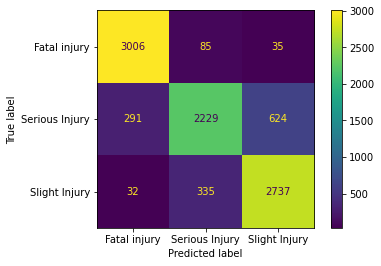

In [ ]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,ConfusionMatrixDisplay
matrix_SVC=confusion_matrix(y_test,y_SVC)
print(matrix_SVC,'\n')
print(ConfusionMatrixDisplay.from_predictions(y_test,y_SVC))
accuracy_SVC=accuracy_score(y_test,y_SVC)
print(accuracy_SVC,'\n')
report_SVC=classification_report(y_test,y_SVC)
print(report_SVC)

**Inference:** The accuracy of the model is 85% and The model achieved high precision and recall for Fatal injury (0.90 and 0.96, respectively), which means it correctly identified most of the accidents with fatal injuries and had a low false positive rate. However, the model had lower precision and recall for Serious injury (0.84 and 0.71) and Slight injury (0.81 and 0.88), indicating that it had more difficulty distinguishing between these levels of severity.

Overall, the model seems to perform well in identifying accidents with fatal injuries but may need further improvements to accurately predict the severity of accidents with lower levels of severity.
